In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Preprocess data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 77s 48ms/step - loss: 1.5128 - accuracy: 0.4514 - val_loss: 1.2340 - val_accuracy: 0.5555
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1574 - accuracy: 0.5906 - val_loss: 1.0782 - val_accuracy: 0.6155
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0109 - accuracy: 0.6415 - val_loss: 1.0139 - val_accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9178 - accuracy: 0.6782 - val_loss: 0.9802 - val_accuracy: 0.6635
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8391 - accuracy: 0.7045 - val_loss: 0.8892 - val_accuracy: 0.6940
Epoch 6/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.7781 - accuracy: 0.7263 - val_loss: 0.8824 - val_accuracy: 0.6994
Epoch 7/10
1563/1563 [==============================] - 7

In [19]:
# Make predictions on a single image
import numpy as np

# Select a single image from the test dataset
image_index = 5
test_image = np.expand_dims(x_test[image_index], axis=0)

# Make prediction
prediction = model.predict(test_image)
predicted_class = np.argmax(prediction)

# Display the predicted class
print('Predicted class:', predicted_class)

1/1 [==============================] - 0s 22ms/step
Predicted class: 6


1/1 [==============================] - 0s 39ms/step


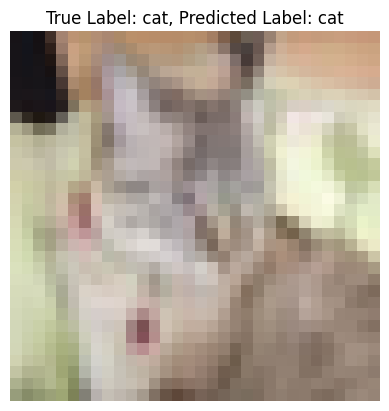

In [35]:
import matplotlib.pyplot as plt

# Define class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Function to display image and predicted class
def visualize_result(image, true_label, predicted_label):
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True Label: {class_labels[true_label[0]]}, Predicted Label: {class_labels[predicted_label]}")
    plt.show()

# Select a single image from the test dataset
image_index = 8
test_image = x_test[image_index]
true_label = y_test[image_index]

# Make prediction
prediction = model.predict(np.expand_dims(test_image, axis=0))
predicted_label = np.argmax(prediction)

# Display the image and predicted class
visualize_result(test_image, true_label, predicted_label)

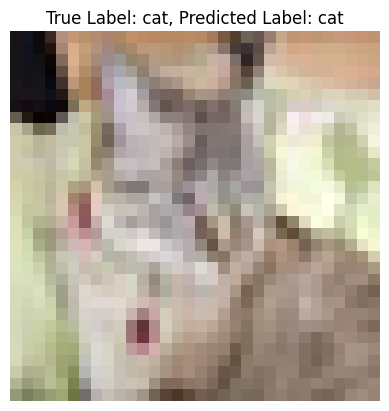

In [38]:
import cv2

# Function to enhance image clarity
def enhance_image(image):
    """
    Enhances the clarity of an image using Gaussian blur followed by unsharp masking.

    Args:
    image: Input image to be enhanced.

    Returns:
    Enhanced image.
    """
    # Apply Gaussian blur to reduce noise and blur
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    # Apply unsharp masking to sharpen the image
    sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)
    return sharpened_image

# Function to visualize image with labels
def visualize_result(image, true_label, predicted_label):
    """
    Displays an image along with its true and predicted labels.

    Args:
    image: Image to be displayed.
    true_label: True label of the image.
    predicted_label: Predicted label of the image.
    """
    # Define class labels
    class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

    # Display image with labels
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True Label: {class_labels[true_label[0]]}, Predicted Label: {class_labels[predicted_label]}")
    plt.show()

# Select a single image from the test dataset
image_index = 8
test_image = x_test[image_index]

# Enhance the image
enhanced_image = enhance_image(test_image)

# Display the enhanced image
visualize_result(enhanced_image, true_label, predicted_label)